In [1]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib

     |████████████████████████████████| 7.4 MB 4.3 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=6b34c50cfdca00b87648de4b908da318dcad707d76f07c2bd3180d7ce9b52256
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 137 kB 5.0 MB/s 
     |████████████████████████████████| 1.3 MB 43.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.3 MB 50.5 MB/s 
  Created wheel for pyEDFlib: filename=pyEDFlib-0.1.22-cp37-cp37m-linux_x86_64.whl size=1520581 sha256=1f3142608a7a3703176e53de4a27e4d906b3efc12a185f17d5ff44179d3b1608
  Stored in directory: /root/.cache/pip/wheels/14/80/1f/e0e403cc35286c74f1d29f55bb5e304d030fb2f560ba7c979f
Successfully built pyEDFlib
  Attempting uninstall: matplotlib
    Found existing installation

In [ ]:
# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
  
print(color.BOLD+color.UNDERLINE+'Title'+color.END)
print('Hello World')

Title
Hello World


In [ ]:
import wfdb 

dbs = wfdb.get_dbs()

records_list = wfdb.io.get_record_list('chbmit', records='all')
records_list[:5]

['chb01/chb01_01.edf',
 'chb01/chb01_02.edf',
 'chb01/chb01_03.edf',
 'chb01/chb01_04.edf',
 'chb01/chb01_05.edf']

In [ ]:
part_codes = sorted(list(set([record.split('/')[0] for record in records_list])))
part_codes

['chb01',
 'chb02',
 'chb03',
 'chb04',
 'chb05',
 'chb06',
 'chb07',
 'chb08',
 'chb09',
 'chb10',
 'chb11',
 'chb12',
 'chb13',
 'chb14',
 'chb15',
 'chb16',
 'chb17',
 'chb18',
 'chb19',
 'chb20',
 'chb21',
 'chb22',
 'chb23',
 'chb24']

In [ ]:
import os
from urllib.request import urlretrieve

def get_content(part_code):
  url = "https://physionet.org/physiobank/database/chbmit/"+part_code+'/'+part_code+'-summary.txt'
  filename = "./chbmit.txt"

  urlretrieve(url,filename)

  # read the file into a list
  with open(filename, encoding='UTF-8') as f:
      # read all the document into a list of strings (each line a new string)
      content = f.readlines()
      os.remove(filename)

  return content

get_content(part_codes[0])

['Data Sampling Rate: 256 Hz\n',
 '*************************\n',
 '\n',
 'Channels in EDF Files:\n',
 '**********************\n',
 'Channel 1: FP1-F7\n',
 'Channel 2: F7-T7\n',
 'Channel 3: T7-P7\n',
 'Channel 4: P7-O1\n',
 'Channel 5: FP1-F3\n',
 'Channel 6: F3-C3\n',
 'Channel 7: C3-P3\n',
 'Channel 8: P3-O1\n',
 'Channel 9: FP2-F4\n',
 'Channel 10: F4-C4\n',
 'Channel 11: C4-P4\n',
 'Channel 12: P4-O2\n',
 'Channel 13: FP2-F8\n',
 'Channel 14: F8-T8\n',
 'Channel 15: T8-P8\n',
 'Channel 16: P8-O2\n',
 'Channel 17: FZ-CZ\n',
 'Channel 18: CZ-PZ\n',
 'Channel 19: P7-T7\n',
 'Channel 20: T7-FT9\n',
 'Channel 21: FT9-FT10\n',
 'Channel 22: FT10-T8\n',
 'Channel 23: T8-P8\n',
 '\n',
 'File Name: chb01_01.edf\n',
 'File Start Time: 11:42:54\n',
 'File End Time: 12:42:54\n',
 'Number of Seizures in File: 0\n',
 '\n',
 'File Name: chb01_02.edf\n',
 'File Start Time: 12:42:57\n',
 'File End Time: 13:42:57\n',
 'Number of Seizures in File: 0\n',
 '\n',
 'File Name: chb01_03.edf\n',
 'File Sta

In [ ]:
import re
part_info_dict = {}

def info_dict(content):
  
  line_nos=len(content)
  line_no=1

  channels = []
  file_name = []
  file_info_dict={}

  for line in content:

    # if there is Channel in the line...
    if re.findall('Channel \d+', line):
      # split the line into channel number and channel reference
      channel = line.split(': ')
      # get the channel reference and remove any new lines
      channel = channel[-1].replace("\n", "")
      # put into the channel list
      channels.append(channel)

    # if the line is the file name
    elif re.findall('File Name', line):
      # if there is already a file_name
      if file_name:
        # flush the current file info to it
        part_info_dict[file_name] = file_info_dict

      # get the file name
      file_name = re.findall('\w+\d+_\d+|\w+\d+\w+_\d+', line)[0]

      file_info_dict = {}
      # put the channel list in the file info dict and remove duplicates
      file_info_dict['Channels'] = list(set(channels))
      # reset the rest of the options
      file_info_dict['Start Time'] = ''
      file_info_dict['End Time'] = ''
      file_info_dict['Seizures Window'] = []

    # if the line is about the file start time
    elif re.findall('File Start Time', line):
      # get the start time
      file_info_dict['Start Time'] = re.findall('\d+:\d+:\d+', line)[0]

    # if the line is about the file end time
    elif re.findall('File End Time', line):
      # get the start time
      file_info_dict['End Time'] = re.findall('\d+:\d+:\d+', line)[0]

    elif re.findall('Seizure Start Time|Seizure End Time|Seizure \d+ Start Time|Seizure \d+ End Time', line):
      file_info_dict['Seizures Window'].append(int(re.findall('\d+', line)[-1]))

    # if last line in the list...
    if line_no == line_nos:
      # flush the file info to it
      part_info_dict[file_name] = file_info_dict

    line_no+=1
    
        
for part_code in part_codes:
  content = get_content(part_code)
  info_dict(content)


print(color.BOLD+color.UNDERLINE+'part_info_dict'+color.END)
display(part_info_dict['chb01_18'])
print(color.UNDERLINE+'\nPart Keys'+color.END)
print(part_info_dict[list(part_info_dict.keys())[0]].keys())

part_info_dict


{'Channels': ['P7-O1',
  'CZ-PZ',
  'F3-C3',
  'F7-T7',
  'P8-O2',
  'F8-T8',
  'FZ-CZ',
  'P7-T7',
  'FP1-F3',
  'T7-FT9',
  'T7-P7',
  'T8-P8',
  'FP2-F8',
  'C4-P4',
  'P4-O2',
  'C3-P3',
  'F4-C4',
  'FP1-F7',
  'FT10-T8',
  'P3-O1',
  'FP2-F4',
  'FT9-FT10'],
 'End Time': '5:45:06',
 'Seizures Window': [1720, 1810],
 'Start Time': '04:45:06'}


Part Keys
dict_keys(['Channels', 'Start Time', 'End Time', 'Seizures Window'])


In [ ]:
import pandas as pd     # dataframes
import re

all_channels = []

for key in part_info_dict.keys():
    all_channels.extend(part_info_dict[key]['Channels'])
    
# turn the list into a pandas series
all_channels = pd.Series(all_channels)

# count how many times the channels appear in each participant
channel_counts = all_channels.value_counts()
channel_counts

P8-O2      675
FP2-F4     675
FZ-CZ      675
FP1-F3     675
P4-O2      675
          ... 
C2          13
CP4         13
CP6         13
CZ          13
LOC-ROC     11
Length: 87, dtype: int64

In [ ]:
threshold = len(part_info_dict.keys())
channel_keeps = list(channel_counts[channel_counts >= threshold].index)
channel_keeps

['P8-O2',
 'FP2-F4',
 'FZ-CZ',
 'FP1-F3',
 'P4-O2',
 'P3-O1',
 'FP1-F7',
 'F3-C3',
 'CZ-PZ',
 'F7-T7',
 'P7-O1',
 'F4-C4',
 'T7-P7',
 'C3-P3',
 'T8-P8',
 'FP2-F8',
 'C4-P4',
 'F8-T8']

In [ ]:
EXAMPLE_FILE = records_list[1]
EXAMPLE_ID = EXAMPLE_FILE.split('/')[1].split('.')[0]
EXAMPLE_ID

'chb01_02'

In [ ]:
%%time
import pandas as pd
import numpy as np
import pyedflib

def data_load(file, selected_channels=[]):

  try: 
    url = "https://physionet.org/physiobank/database/chbmit/"+file
    filename = "./chbmit.edf"

    urlretrieve(url,filename)
    # use the reader to get an EdfReader file
    f = pyedflib.EdfReader(filename)
    os.remove(filename)
    
    # get a list of the EEG channels
    if len(selected_channels) == 0:
      selected_channels = f.getSignalLabels()

    # get the names of the signals
    channel_names = f.getSignalLabels()
    # get the sampling frequencies of each signal
    channel_freq = f.getSampleFrequencies()

    # make an empty file of 0's
    sigbufs = np.zeros((f.getNSamples()[0],len(selected_channels)))
    # for each of the channels in the selected channels
    for i, channel in enumerate(selected_channels):
      # add the channel data into the array
      sigbufs[:, i] = f.readSignal(channel_names.index(channel))
    
    # turn to a pandas df and save a little space
    df = pd.DataFrame(sigbufs, columns = selected_channels).astype('float32')
    
    # get equally increasing numbers upto the length of the data depending
    # on the length of the data divided by the sampling frequency
    index_increase = np.linspace(0,
                                 len(df)/channel_freq[0],
                                 len(df), endpoint=False)

    # round these to the lowest nearest decimal to get the seconds
    seconds = np.floor(index_increase).astype('uint16')

    # make a column the timestamp
    df['Time'] = seconds

    # make the time stamp the index
    df = df.set_index('Time')

    # name the columns as channel
    df.columns.name = 'Channel'

    return df, channel_freq[0]

  except:
    OSError
    return pd.DataFrame(), None


raw_data, freq = data_load(EXAMPLE_FILE, channel_keeps)
display(raw_data.head())

Channel,P8-O2,FP2-F4,FZ-CZ,FP1-F3,P4-O2,P3-O1,FP1-F7,F3-C3,CZ-PZ,F7-T7,P7-O1,F4-C4,T7-P7,C3-P3,T8-P8,FP2-F8,C4-P4,F8-T8
Time,,,,,,,,,,,,,,,,,,
0,6.056166,13.870574,-32.625153,40.83028,-14.261294,28.717949,15.042735,-12.307693,-26.373627,15.042735,-13.479854,-7.619048,28.327229,-12.307693,-27.155067,-15.433455,3.711844,32.234432
0,0.195360,0.195360,0.195360,0.19536,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
0,0.586081,0.195360,0.195360,0.19536,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
0,0.976801,-0.195360,0.195360,-0.19536,0.976801,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,-0.195360
0,-5.274725,0.195360,0.195360,0.19536,-4.102564,0.586081,-0.195360,0.195360,0.195360,0.976801,0.195360,-0.195360,0.195360,-0.195360,0.586081,-2.539683,0.195360,2.930403


CPU times: user 1.43 s, sys: 264 ms, total: 1.7 s
Wall time: 2.9 s


Creating RawArray with float64 data, n_channels=18, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.


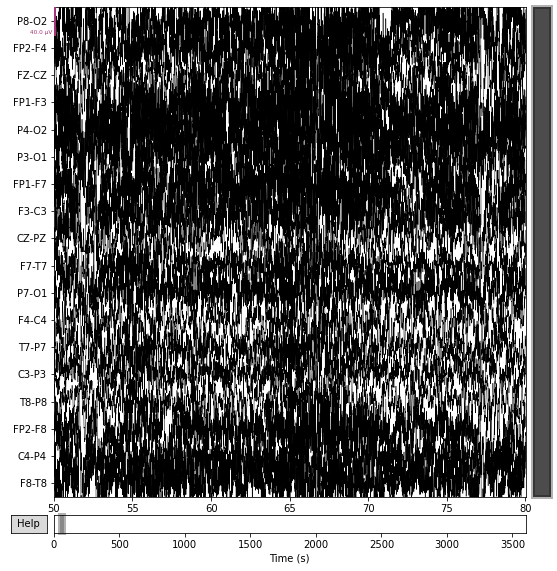

In [ ]:
import os
import numpy as np
import mne

def mne_object(data, freq, events = None):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns), 
                         sfreq=freq, 
                         ch_types=['eeg']*data.shape[-1])
  
  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()
  
  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  if events:
    start_times = np.array(events[::2])
    end_times = np.array(events[1::2])
    anno_length = end_times-start_times
    event_name = np.array(['Ictal']*len(anno_length))

    raw.set_annotations(mne.Annotations(start_times,
                                      anno_length,
                                      event_name))

  return raw

mne_data = mne_object(raw_data, freq, part_info_dict[EXAMPLE_ID]['Seizures Window'])


mne_data.plot(start = 50, duration = 30);
seiz_start_time = part_info_dict[EXAMPLE_ID]['Seizures Window']

In [ ]:
replace_dict = {}
drop_list = []
# for the channel names in the data...
for channel_name in mne_data.info['ch_names']:
    # get the name to change too
    name_change = re.findall('\w+',channel_name)[0].title()
    # check if it is already in the change list
    if name_change in list(replace_dict.values()):
        drop_list.append(channel_name)
    else:
        # if its not already there get the origional name and what we want to 
        # change it to
        replace_dict[channel_name] = name_change

# drop the ones that would be repeats
mne_data.drop_channels(drop_list)
# rename the channels
mne_data.rename_channels(replace_dict)
# set the standard montage
mne_data.set_montage('standard_1020')

<RawArray | 16 x 921600 (3600.0 s), ~112.5 MB, data loaded>

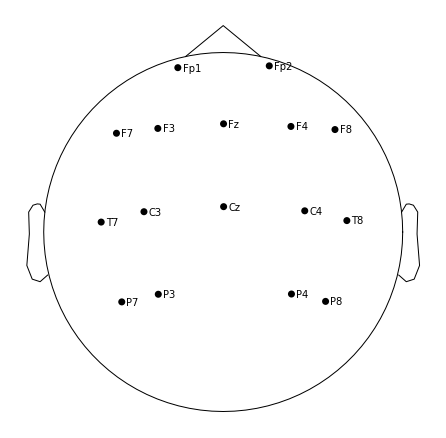

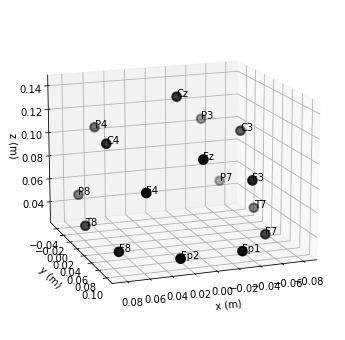

In [ ]:
from matplotlib import pyplot as plt
mne_data.plot_sensors(kind='topomap', show_names=True, to_sphere=True);
fig = mne_data.plot_sensors(kind='3d', show_names=True, show=False)
fig = fig.gca().view_init(azim=70, elev=15)
plt.show()